A função de Himmelblau
========================================



## Introdução



A função de Himmelblau é uma função de teste comumente utilizada em otimização e análise numérica. A função recebe o nome de David Mautner Himmelblau, um pesquisador americano que propôs esta função em 1972. A função é um polinômio multivariável e tem 4 mínimos locais, o que torna um desafio para algoritmos de otimização. O objetivo da minimização da função de Himmelblau é encontrar o conjunto de valores de entrada que resultam no menor valor possível da função de saída. 

## Objetivo



Encontrar a coordenada $(x,y)$ do mínimo da função de Himmelblau abaixo.

$$
f(x,y) = (x^2 +y -11)^2 + (x + y^2 - 7)^2
$$

utilizando um algoritmo genético.

## Importações



In [1]:
from funcoes import populacao_inicial_hb
from funcoes import funcao_objetivo_pop_hb
from funcoes import selecao_torneio_min
from funcoes import cruzamento_ponto_simples as funcao_cruzamento
from funcoes import mutacao_hb
import random as rd
import numpy as np
import matplotlib.pyplot as plt; plt.style.use('seaborn-bright')

## Códigos e discussão



In [2]:
# CONSTANTES

# relacionadas à busca
TAMANHO_POP = 500
CHANCE_CRUZAMENTO = 0.5
CHANCE_MUTACAO = 0.05
NUM_COMBATENTES_NO_TORNEIO = 3
STEP_MAXIMO = 0.1
NUM_GERACOES = 50
NUM_EXPERIMENTOS = 8

#relacionadas ao problema a ser resolvido:
XLIM = [-10,10]
YLIM = [-10,10]
NUM_GENES = 2

# cores para os gráficos:
cores = ['b', 'r', 'g', 'purple', 'orange', 'brown', 'yellow', 'pink']

In [3]:
# funções locais (para não ter que colocar as variaveis locais no script)

def cria_populacao_inicial(tamanho, nada):
    return populacao_inicial_hb(tamanho, XLIM, YLIM)

def funcao_objetivo_pop(populacao):
    return funcao_objetivo_pop_hb(populacao)

def funcao_selecao(populacao, fitness):
    return selecao_torneio_min(populacao, fitness, NUM_COMBATENTES_NO_TORNEIO)

def funcao_mutacao(individuo):
    return mutacao_hb(individuo, STEP_MAXIMO)

Como a função de himmelblau possui mais de um mínimo local, então resolvi repetir o experimento várias vezes, para encontrar mais de um mínimo. Para isso, cada experimento será representado por uma cor da lista "cores".

Progresso da melhor ponto já vista:

Melhor ponto encontrado no experimento 1:
[2.9297676600440807, 2.000362688675655] fitness:  9.007077725926326e-06

Progresso da melhor ponto já vista:

Melhor ponto encontrado no experimento 2:
[3.000431652841001, 2.0001482518806473] fitness:  8.548563382178745e-06

Progresso da melhor ponto já vista:

Melhor ponto encontrado no experimento 3:
[-2.804604672157373, 3.131062419168575] fitness:  1.0906624720761506e-05

Progresso da melhor ponto já vista:

Melhor ponto encontrado no experimento 4:
[3.5003098190431947, -1.8481683005443863] fitness:  8.75030736526279e-06

Progresso da melhor ponto já vista:

Melhor ponto encontrado no experimento 5:
[3.0002355635154543, 2.025821273232849] fitness:  4.893966654525753e-06

Progresso da melhor ponto já vista:

Melhor ponto encontrado no experimento 6:
[-3.779682147523951, -3.2833964939082017] fitness:  7.784226202828595e-06

Progresso da melhor ponto já vista:

Melhor ponto encontrado no experimento 7:
[2.99

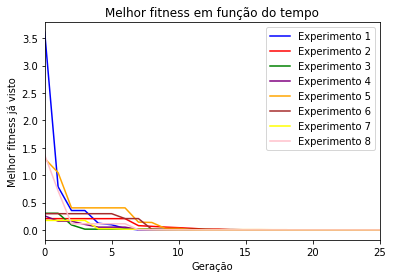

In [4]:
# listas para plotar as populações depois
ex_pop_inicial = []
ex_pop_final = []
fig, ax = plt.subplots(1, 1)
# Loop para repetir o experimento:
for u in range(NUM_EXPERIMENTOS):
    populacao = cria_populacao_inicial(TAMANHO_POP, NUM_GENES)

    populacao_inicial_plot = populacao.copy()

    melhor_fitness_ja_visto = float("inf")

    lista_fitness_medio = []
    lista_melhor_fitness = []

    print("Progresso da melhor ponto já vista:")

    for _ in range(NUM_GERACOES):
        # Seleção
        fitness = funcao_objetivo_pop(populacao)
        populacao = funcao_selecao(populacao, fitness)

        # Cruzamento
        pais = populacao[0::2]
        maes = populacao[1::2]

        contador = 0

        for pai, mae in zip(pais, maes):
            if rd.random() <= CHANCE_CRUZAMENTO:
                filho1, filho2 = funcao_cruzamento(pai, mae)
                populacao[contador] = filho1
                populacao[contador + 1] = filho2
            contador = contador + 2
        # Mutação
        for n in range(len(populacao)):
            if rd.random() <= CHANCE_MUTACAO:
                individuo = populacao[n]
                populacao[n] = funcao_mutacao(individuo)
        # melhor individuo já visto até agora
        fitness = funcao_objetivo_pop(populacao)
        lista_fitness_medio.append(np.average(fitness))
        menor_fitness = min(fitness)
        if menor_fitness < melhor_fitness_ja_visto:
            posicao = fitness.index(menor_fitness)
            melhor_individuo_ja_visto = populacao[posicao]
            melhor_fitness_ja_visto = menor_fitness
            # print(melhor_individuo_ja_visto, "- fitness:", melhor_fitness_ja_visto)
        lista_melhor_fitness.append(melhor_fitness_ja_visto)
    print()
    print(f"Melhor ponto encontrado no experimento {u+1}:")
    print(melhor_individuo_ja_visto, "fitness: ", melhor_fitness_ja_visto)
    print()

    ax.plot(range(len(lista_melhor_fitness)), lista_melhor_fitness, c=cores[u], label = f"Experimento {u+1}")
    ax.set_xlabel("Geração")
    ax.set_ylabel("Melhor fitness já visto")
    ax.set_title("Melhor fitness em função do tempo")
    ax.set_xlim(0, 25)
    ax.legend()

    ex_pop_inicial.append(populacao_inicial_plot)
    ex_pop_final.append(populacao)

Agora plotarei o gráfico com todos os pontos candidatos da população inicial de cada iteração do experimento. Cada população inicial de cada experimento é representada pela sua respectiva cor. Em seguida plotarei as populações finais, de todos os experimentos. Observa-se que as populações finais se concentram nos quatro mínimos locais da função. Rodando o experimento 8 vezes, nem sempre todos os quatro pontos aparecem, já que os experimentos podem converger para o mesmo ponto várias vezes.

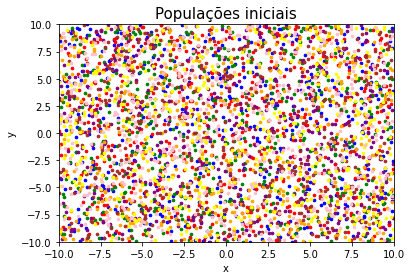

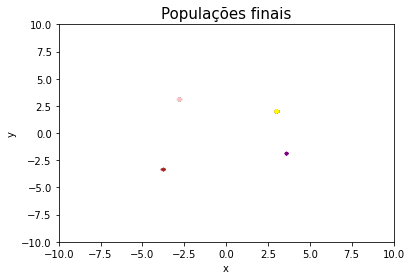

In [5]:
# Plotando as populações iniciais e finais para cada experimento
# Cada cor corresponde a um experimento:

fig, ax1 = plt.subplots(1, 1)
fig, ax2 = plt.subplots(1, 1)

u = 0
for inicial, final in zip(ex_pop_inicial, ex_pop_final):
    x_inicial = [k[0] for k in inicial]
    y_inicial = [i[1] for i in inicial]

    x_final = [k[0] for k in final]
    y_final = [i[1] for i in final]
    
    ax1.scatter(x_inicial, y_inicial, c = cores[u], s = 7)
    ax1.set_xlim(XLIM)
    ax1.set_ylim(YLIM)
    ax1.set_xlabel("x")
    ax1.set_ylabel("y")
    ax1.set_title('Populações iniciais', size = 15)

    ax2.scatter(x_final, y_final, c = cores[u], s = 1)
    ax2.set_xlim(XLIM)
    ax2.set_ylim(YLIM)
    ax2.set_xlabel("x")
    ax2.set_ylabel("y")
    ax2.set_title('Populações finais', size = 15)
    u += 1

## Conclusão

Novamente utilizei a mesma estratégia que o problema da senha, só foi preciso mudar a função que gera o indivíduo, a função objetivo, que é a função de Himmelblau e a função de mutação. Para gerar o indivíduo, eu fiz um código que sorteia dois número entre os limites superior e inferior fornecidos para a função, e esses dois números correspondem ao ponto (x,y). Para a mutação, criei uma função que recebe um ponto e dá um "passo" na direção x ou y. Esse passo tem um tamanho que é sorteado até um valor de "step_maximo". Para o cruzamento usei a função de cruzamento ponto simples e para a seleção usei a seleção torneio. Também repeti o experimento várias vezes em um loop. Para visualizar os resultados, criei plots de fitness em função da geração e também plotei as populações finais e iniciais no plano xy, o que permite visualizar a localização dos mínimos da função.

## Playground

In [6]:
import matplotlib.animation as animation

In [7]:
STEP_MAXIMO = 0.001
NUM_GERACOES = 40
TAMANHO_POP = 10000
CHANCE_MUTACAO = 0.4
CHANCE_CRUZAMENTO = 0.1

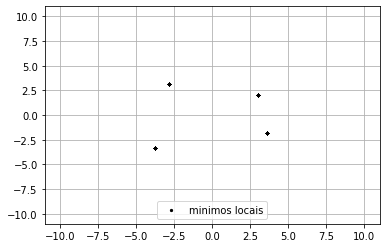

In [8]:
# Gerando gif dos experimentos:
fig, ax = plt.subplots(1, 1)
ims = []
ax.grid('--')

xminimos = [3,-2.80512, -3.779310, 3.5844]
yminimos = [2,3.1313, -3.2832, -1.8481]
ax.scatter(xminimos, yminimos, c = '0', s = 5, label = 'minimos locais')
ax.legend(loc="lower center")

for u in cores:
    populacao = cria_populacao_inicial(TAMANHO_POP, NUM_GENES)
    for _ in range(NUM_GERACOES):

        populacao_plot = populacao.copy()
        x = [i[0] for i in populacao_plot]
        y = [i[1] for i in populacao_plot]

        im = ax.scatter(x, y, c = u, s = 12)
        ax.scatter(xminimos, yminimos, c = '0', s = 4.5)

        ims.append([im])
        # Seleção
        fitness = funcao_objetivo_pop(populacao)
        populacao = funcao_selecao(populacao, fitness)

        # Cruzamento
        pais = populacao[0::2]
        maes = populacao[1::2]

        contador = 0

        for pai, mae in zip(pais, maes):
            if rd.random() <= CHANCE_CRUZAMENTO:
                filho1, filho2 = funcao_cruzamento(pai, mae)
                populacao[contador] = filho1
                populacao[contador + 1] = filho2
            contador = contador + 2
        # Mutação
        for n in range(len(populacao)):
            if rd.random() <= CHANCE_MUTACAO:
                individuo = populacao[n]
                populacao[n] = funcao_mutacao(individuo)

ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True,
                                repeat_delay=100)
writer = animation.PillowWriter(fps=5,  bitrate=9000)
#ani.save("himmelblau.png", writer=writer, dpi = 200)